In [1]:
import pandas as pd
text_ana = pd.read_excel('text_analysis_twitter_sample.xlsx')
text_ana = text_ana.drop(["Unnamed: 0"], axis=1)
text_ana

,index,id,screen_name,time,link,text,source
0,49374,890587249372524544,auctnr1,2017-07-27T10:58:41-04:00,https://www.twitter.com/Reuters/statuses/89058...,"RT @Reuters MORE: Top U.S. general says, given...",Twitter for iPhone
1,83246,899354463055618048,SenatorTester,2017-08-20T15:36:27-04:00,https://www.twitter.com/SenatorTester/statuses...,T-minus 2 days until our first-ever Last Best ...,Twitter Web Client
2,100988,903272105738985472,KeithRothfus,2017-08-31T11:03:46-04:00,https://www.twitter.com/KeithRothfus/statuses/...,Please know that help is available. Visit http...,Twitter Web Client
3,193395,921001114409021440,HASCRepublicans,2017-10-19T09:12:31-04:00,https://www.twitter.com/HASCRepublicans/status...,Literally flying the wings off the A-10 in fig...,Twitter Web Client
4,12662,884911451449774080,SteveKnight25,2017-07-11T19:05:05-04:00,https://www.twitter.com/SteveKnight25/statuses...,Today the House unanimously passed my bill #HR...,Twitter Web Client
...,...,...,...,...,...,...,...
495,108175,905927436315086848,JeffFortenberry,2017-09-07T18:55:06-04:00,https://www.twitter.com/JeffFortenberry/status...,Great conversation with presidential historian...,Twitter Web Client
496,157423,915340759154409472,FlakeforSenate,2017-10-03T18:20:17-04:00,https://www.twitter.com/FlakeforSenate/statuse...,ICYMI over the weekend: @JeffFlake teams up wi...,TweetDeck
497,72173,896489606316773376,RepSeanMaloney,2017-08-12T17:52:32-04:00,https://www.twitter.com/RepSeanMaloney/statuse...,one of America's most beautiful &amp; welcomin...,Twitter for iPhone
498,232181,927641544819081216,ChrisMurphyCT,2017-11-06T15:59:13-05:00,https://www.twitter.com/SenatorDurbin/statuses...,RT @SenatorDurbin 94% of Americans (93% of gun...,Twitter for iPhone


In [2]:
import re
def preprocess_text(text):
    text = text.lower()
    text = re.sub(r"http\S+",'',text)
    return  text

In [7]:
text_ana['text'].apply(preprocess_text)

0      rt @reuters more: top u.s. general says, given...
1      t-minus 2 days until our first-ever last best ...
2      please know that help is available. visit  or ...
3      literally flying the wings off the a-10 in fig...
4      today the house unanimously passed my bill #hr...
                             ...                        
495    great conversation with presidential historian...
496    icymi over the weekend: @jeffflake teams up wi...
497    one of america's most beautiful &amp; welcomin...
498    rt @senatordurbin 94% of americans (93% of gun...
499    rt @vvamerica "the #forevergibill shows just h...
Name: text, Length: 500, dtype: object

In [8]:
from sklearn.feature_extraction.text import CountVectorizer
#初始化
vectorizer = CountVectorizer()
# 将文本数据转换为特征矩阵
X = vectorizer.fit_transform(text_ana['text'].apply(preprocess_text))
# 展示特征矩阵的形状
print(X.shape)
# 打印特征词
print(vectorizer.get_feature_names_out()[:100])

(500, 3570)
['00' '000' '00am' '10' '100' '100th' '106' '10thamendment' '11' '115'
 '118' '12' '126' '13' '1386' '14' '1404' '14th' '15' '153' '15am' '15k'
 '16' '17' '18' '180' '188' '1888' '189' '19' '194' '1942' '1948' '1967'
 '1979' '1982' '1984' '1october' '1st' '20' '200' '2017' '2018' '20t'
 '20th' '21airract' '21st' '226' '231' '232' '245' '247' '25' '28' '28am'
 '29' '2nd' '2pm' '30' '30th' '31reasons4taxreform' '32' '3562' '362'
 '375' '3m' '3pm' '3rd' '419' '42' '4357' '4391' '44' '45' '4h' '4pm'
 '4th' '4thofjuly' '50' '500k' '52' '5244' '553' '58' '5th' '60' '600'
 '602' '61' '639' '662' '69' '6pm' '732' '75' '75th' '76' '7th' '800' '82']


In [11]:
feature_words = vectorizer.get_feature_names_out()

word_freq = dict(zip(feature_words, X.sum(axis=0).A1))

In [12]:
word_freq

{'00': 2,
 '000': 4,
 '00am': 1,
 '10': 10,
 '100': 4,
 '100th': 1,
 '106': 1,
 '10thamendment': 1,
 '11': 3,
 '115': 1,
 '118': 1,
 '12': 5,
 '126': 1,
 '13': 2,
 '1386': 1,
 '14': 1,
 '1404': 1,
 '14th': 1,
 '15': 3,
 '153': 1,
 '15am': 1,
 '15k': 1,
 '16': 1,
 '17': 2,
 '18': 2,
 '180': 1,
 '188': 1,
 '1888': 1,
 '189': 1,
 '19': 1,
 '194': 1,
 '1942': 1,
 '1948': 1,
 '1967': 1,
 '1979': 1,
 '1982': 1,
 '1984': 1,
 '1october': 1,
 '1st': 2,
 '20': 5,
 '200': 1,
 '2017': 5,
 '2018': 2,
 '20t': 1,
 '20th': 1,
 '21airract': 2,
 '21st': 2,
 '226': 1,
 '231': 1,
 '232': 1,
 '245': 1,
 '247': 1,
 '25': 1,
 '28': 1,
 '28am': 1,
 '29': 1,
 '2nd': 1,
 '2pm': 2,
 '30': 3,
 '30th': 1,
 '31reasons4taxreform': 1,
 '32': 1,
 '3562': 1,
 '362': 1,
 '375': 1,
 '3m': 1,
 '3pm': 1,
 '3rd': 1,
 '419': 1,
 '42': 1,
 '4357': 1,
 '4391': 1,
 '44': 1,
 '45': 2,
 '4h': 1,
 '4pm': 1,
 '4th': 1,
 '4thofjuly': 1,
 '50': 2,
 '500k': 1,
 '52': 1,
 '5244': 1,
 '553': 1,
 '58': 1,
 '5th': 2,
 '60': 1,
 '600': 1,


In [10]:
print(word_freq)

{'00': 2, '000': 4, '00am': 1, '10': 10, '100': 4, '100th': 1, '106': 1, '10thamendment': 1, '11': 3, '115': 1, '118': 1, '12': 5, '126': 1, '13': 2, '1386': 1, '14': 1, '1404': 1, '14th': 1, '15': 3, '153': 1, '15am': 1, '15k': 1, '16': 1, '17': 2, '18': 2, '180': 1, '188': 1, '1888': 1, '189': 1, '19': 1, '194': 1, '1942': 1, '1948': 1, '1967': 1, '1979': 1, '1982': 1, '1984': 1, '1october': 1, '1st': 2, '20': 5, '200': 1, '2017': 5, '2018': 2, '20t': 1, '20th': 1, '21airract': 2, '21st': 2, '226': 1, '231': 1, '232': 1, '245': 1, '247': 1, '25': 1, '28': 1, '28am': 1, '29': 1, '2nd': 1, '2pm': 2, '30': 3, '30th': 1, '31reasons4taxreform': 1, '32': 1, '3562': 1, '362': 1, '375': 1, '3m': 1, '3pm': 1, '3rd': 1, '419': 1, '42': 1, '4357': 1, '4391': 1, '44': 1, '45': 2, '4h': 1, '4pm': 1, '4th': 1, '4thofjuly': 1, '50': 2, '500k': 1, '52': 1, '5244': 1, '553': 1, '58': 1, '5th': 2, '60': 1, '600': 1, '602': 1, '61': 1, '639': 1, '662': 1, '69': 1, '6pm': 1, '732': 1, '75': 1, '75th': 1

In [13]:
sorted(word_freq.items(), key = lambda x:x[1], reverse=True)

[('the', 422),
 ('to', 405),
 ('of', 232),
 ('and', 194),
 ('in', 183),
 ('for', 181),
 ('rt', 135),
 ('on', 130),
 ('is', 108),
 ('amp', 96),
 ('our', 91),
 ('you', 88),
 ('we', 82),
 ('with', 81),
 ('this', 74),
 ('at', 71),
 ('it', 62),
 ('qt', 62),
 ('my', 53),
 ('be', 49),
 ('that', 49),
 ('are', 48),
 ('from', 46),
 ('as', 43),
 ('have', 42),
 ('by', 41),
 ('trump', 41),
 ('tax', 40),
 ('who', 40),
 ('today', 38),
 ('will', 37),
 ('not', 36),
 ('here', 32),
 ('all', 30),
 ('your', 30),
 ('an', 28),
 ('new', 28),
 ('bill', 27),
 ('thank', 27),
 ('their', 27),
 ('what', 27),
 ('about', 26),
 ('more', 26),
 ('us', 26),
 ('get', 25),
 ('has', 25),
 ('he', 25),
 ('must', 25),
 ('need', 25),
 ('great', 23),
 ('help', 23),
 ('his', 23),
 ('house', 23),
 ('people', 23),
 ('work', 23),
 ('health', 22),
 ('they', 22),
 ('was', 22),
 ('can', 21),
 ('families', 21),
 ('just', 21),
 ('up', 21),
 ('americans', 20),
 ('congress', 20),
 ('day', 20),
 ('one', 20),
 ('support', 20),
 ('act', 19),


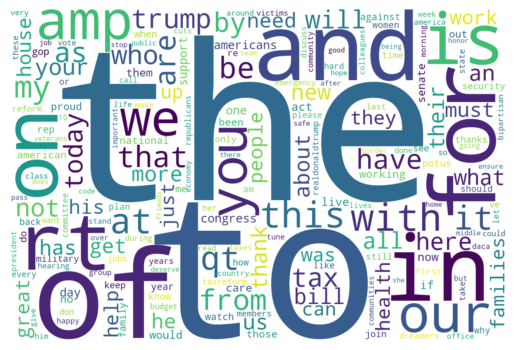

In [22]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wc = WordCloud(
    width=1200,
    height=800,
    max_words=200,
   # max_font_size=100,
    colormap="viridis",
    background_color='white'
)

wc.generate_from_frequencies(word_freq)

plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()
